## **Outline**

In this notebook, we present some results related to generating functions thar are useful to study percolation transitions in complex networks

The following cell allows numbering equations

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## **Generating function basics**

### **Generating functions for the degree distribution**

Let $p_k$ be the degree distribution of the network. Then, we define its generating function as 

$$
G_0(z) = \sum_{k=0}^{\infty} p_k z^k.
$$

As $p_k$ is assumed to be properly normalized, then we have 

$$
G_0(1) =  \sum_{k=0}^{\infty} p_k = 1.
$$

As $p_k$ is normalized and positive definite, $G_0(z)$ is absolutely convergent in the region $|z|\leq 1$. [TODO: prove this].

The generating function allows us to obtain the values of the corresponding probabilities in terms of its derivatives, as

$$
p_k = \dfrac{1}{k!} \dfrac{d^kG_0}{dz^k}\Bigr|_{z=0}.
$$

Also, the moments of the distribution can be also obtained as

$$
\langle k^m \rangle = \sum_{k=0}^{\infty} k^m p_k = \left[ \left( z\dfrac{d}{dz}\right)^m G_0(z) \right]_{z=1},\quad \text{ for } m\in \mathbb{N}.
$$

In particular, the mean degree can be computed as 

$$
\langle k \rangle = G_0'(1).
$$

We can think of $p_k$ as the probability that a node chosen unformly at random has degree $k$. Now, if instead of choosing a node, we select an edge uniformly at random and follow it to one of its ends, then the probability that the arriving node has degree $k$ is

$$
q_k = \dfrac{(k+1)p_{k+1}}{\sum_{k=0}^{\infty} (k+1) p_{k+1}} = \dfrac{(k+1)p_{k+1}}{\sum_{k=0}^{\infty} k p_k} = \dfrac{(k+1)p_{k+1}}{\langle k \rangle}.
$$


The distribution $q_k$ is known as the excess degree distribution, and its generating function is

$$
G_1(z) = \sum_{k=0}^{\infty} q_k z^k = \dfrac{1}{\langle k \rangle} \sum_{k=0}^{\infty} (k+1)p_{k+1} z^k = \dfrac{G'_0(z)}{G'_0(1)}.
$$


**Example: Erdös-Rényi graphs**

In an Erdös-Rényi graph, each link is present with probability $p$. Then, the degree distribution of such networks is 

$$
p_k = {N \choose k} p^k (1-p)^{N-k},
$$

where $N$ is the number of nodes.

The generating function of the degree distribution is then given by

$$
G_0(z) = \sum_{k=0}^{N} {N \choose k} p^k (1-p)^{N-k} z^k = (1-p + pz)^N.
$$

For a sparse network, $p = c/N$, with $c$ independent of $N$. In that case, the limit $N\rightarrow \infty$ implies that

$$
G_0(z) = e^{c(z-1)}.
$$

With a similar analysis it can be shown that this special case satisfies $G_1(z) = G_0(z)$.

### **Component sizes**

Let $t$ be the number of vertices reachable from a given edge. Let also $\rho_t$ and $H_1(z) = \sum_t \rho_t z^t$ be the probability distribution of $t$ and its generating function. 

[TODO: Understand why the following argument is only valid for finite-size components.]

The probability that a vertex of degree $k$ belongs to a component of size $s$ is the probability that the number of vertices reachable along each of its $k$ edges sum to $s-1$. This probability, which we will denote as $P(s|k)$, is given by

$$
P(s|k) = \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} \delta\left( s-1, \sum_{m=1}^k t_m \right) \prod_{m=1}^k \rho_{t_m}.
$$

Then, the probability distribution $\pi_s$ of a randomly chosen node belonging to a component of size $s$ is $\pi_s = \sum_k p_k P(s|k)$ and the corresponding generating function is

$$
\begin{align}
H_0(z) &= \sum_{s=1}^{\infty} \pi_s z^s \nonumber \\
&= \sum_{s=1}^{\infty} \sum_{k=0}^{\infty} p_k P(s|k) z^s \nonumber \\
&=  \sum_{k=0}^{\infty} p_k \sum_{s=1}^{\infty} z^s \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} \delta\left( s-1, \sum_{m=1}^k t_m \right) \prod_{m=1}^k \rho_{t_m} \nonumber \\
&=  z \sum_{k=0}^{\infty} p_k \sum_{t_1=1}^{\infty} \dots  \sum_{t_k=1}^{\infty} z^{\sum_m t_m} \prod_{m=1}^k \rho_{t_m} \nonumber \\
&= z \sum_{k=0}^{\infty} p_k \left[\sum_{t=1}^{\infty} z^t \rho_t\right]^k \nonumber \\
&= z \sum_{k=0}^{\infty} p_k \left[H_1(z)\right]^k \nonumber \\
&= zG_0(H_1(z)).
\end{align}
$$

By a similar argument, we can also obtain the relation

$$
\begin{equation} \label{eq:H1_self_consinstent}
H_1(z) = zG_1(H_1(z)). 
\end{equation}
$$

As $H_0(1)$ represents the sum of the sizes of all the finite components, then the giant component can be simply obtained as 

$$
S = 1-H_0(1) = 1- G_0(u),
$$

where $u\equiv H_1(1)$ is the smallest non-negative real solution of 

$$
u = G_1(u).
$$

Now we define $\langle s \rangle$ as the average size of the component to which a randomly chosen node belongs. This quantity can be computed as 

$$
\begin{align}
\langle s \rangle &= \dfrac{H'_0(1)}{H_0(1)} \nonumber \\
 &= \dfrac{ G_0(H_1(1)) + G'_0(H_1(1))H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{1}{1-S} \left[  G_0(H_1(1)) + G'_0(H_1(1))\dfrac{G_1(H_1(1))}{1-G'_1(H_1(1))} \right] \\
 &= 1+\dfrac{\langle k \rangle u^2}{[1-S][1-G'_1(u)]},
\end{align}
$$

where in the third equality Eq. \ref{eq:H1_self_consinstent} was used. We can see that $\langle s \rangle$ diverges when $G'_1(u) = 1$. This singularity corresponds to the critical point for the percolation transition, where the giant component appears.

For the particular case of ER networks, it can be shown that

$$
\begin{align}
S &= 1 - e^{-cS}, \\
\langle s \rangle &= \dfrac{1}{1-c+cS}.
\end{align}
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import pandas as pd

import sys 
sys.path.append('../python')

from auxiliary import get_base_network_name

import seaborn as sns
from mpl_settings_v3 import *
%matplotlib inline



net_dir = '../networks/ER'

def load_dataframe(attack, size, param, net_type='ER', fast=False, n_seeds=None):
    dir_name = os.path.join('../networks', net_type)
    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
    base_csv_file_name = '{}_nSeeds{:d}_cpp.csv'.format(attack, n_seeds)
    csv_file_name = os.path.join(dir_name, base_net_name, base_net_name_size, base_csv_file_name)
    df = pd.read_csv(csv_file_name, index_col=0)
    return df

n_seeds = 10000
meank = 5
N = 64000

In [5]:
def Pk_ER(kmax, c):
    """
    Complementary cumulative distribution function for 
    the Poisson distribution.
    """
    
    s = 0
    for k in range(kmax):
        s += pk(k, c)
    return 1 - s

def pk_ER(k, c):
    """
    Poisson degree distribution.
    """
    return np.exp(-c) * c**k / np.math.factorial(k)

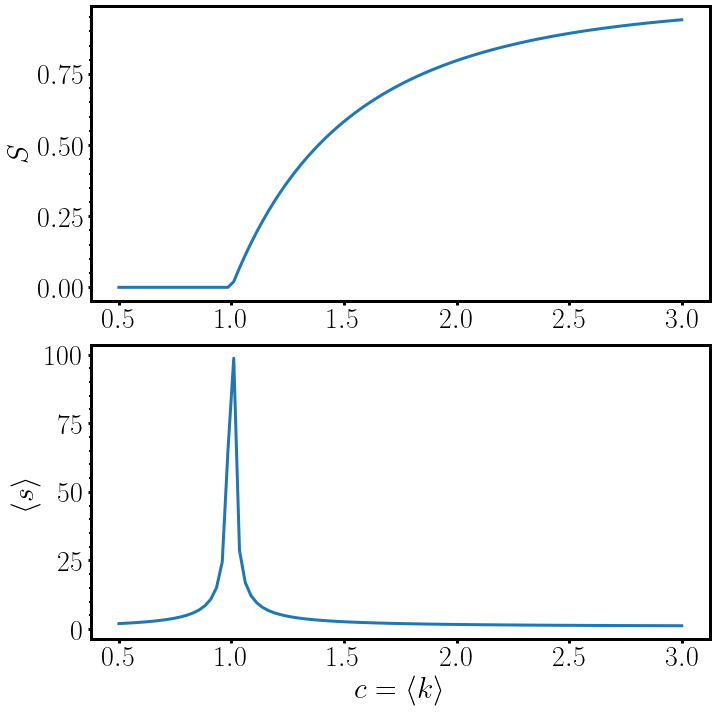

In [6]:
def f(x, c):
    return 1 - x - np.exp(-c*x)

def fprime(x, c):
    return c*np.exp(-c*x) - 1

n_values = 99
c_values = np.linspace(0.5, 3, n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, c in enumerate(c_values):
    sol = root_scalar(f, args=c, fprime=fprime, x0=0.5, method='newton')
    S = sol.root
    #assert 0 <= root <= 1, root
    S_values[i] = S
    meanS_values[i] = 1/(1-c+c*S)  
    
fig, axes = plt.subplots(figsize=(10,10), nrows=2)
ax = axes[0]
#ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$S$')
ax.plot(c_values, S_values)

ax = axes[1]
ax.set_xlabel(r'$c = \langle k \rangle$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(c_values, meanS_values)

plt.tight_layout()
plt.show()

## **Random site percolation**

Suppose we have a network with a degree distribution $p_k$ and we remove a fraction $1-r$ of the nodes. After the remotion, the degree of the remaining nodes will decrease. The new degree distribution is given by 

$$
\begin{equation}
p_m(r) = \sum_{k=m}^{\infty} p_k {k \choose m} r^{m} (1-r)^{k-m}.
\end{equation}
$$

Thus, the generating function of the new degree distribution is given by

$$
\begin{align}
G_0(z;r) &= \sum_{m=0}^{\infty} p_m(r) z^m \\
&= \sum_{m=0}^{\infty}\sum_{k=m}^{\infty} p_k {k \choose m} r^{m} (1-r)^{k-m} z^m \\
&= \sum_{k=0}^{\infty} p_k \sum_{m=0}^{k} {k \choose m} (1-r)^{k-m} [rz]^{m} \\
&= \sum_{k=0}^{\infty} p_k \left[1-r + r z\right]^k \\
&= G_0[1 + (z-1)r].
\end{align}
$$

Similarly, 

$$
\begin{align}
G_1(z;r) &= G_1[1 + (z-1)r].
\end{align}
$$

Note that the following identities stand

$$
\begin{align}
G_0(z;1) &= G_0(z) \\
G_0(1;r) &= G_0(1) \\
G'_0(1;r) &= r G'_0(1),
\end{align}
$$

where the notation $G'_0(z;r)$ represents the derivative with respect to the first argument.

**Percolation transition**

Using an argument similar as before, we define the generating functions $H_0(z;r)$ and $H_1(z;r)$, which satisfy the relations

$$
\begin{align}
H_0(z;r) &= zG_0(H_1(z;r);r) \\
H_1(z;r) &= zG_1(H_1(z;r);r).
\end{align}
$$

With these relations we can compute, as before, the size of the giant component as

$$
S = 1-H_0(1;r) = 1- G_0(u;r),
$$

where $u\equiv H_1(1;r)$ is the smallest non-negative solution of the equation

$$
u = G_1(u;r).
$$

Also, the mean cluster size is given by 

$$
\begin{align}
\langle s \rangle &= \dfrac{H'_0(1;r)}{H_0(1;r)} \nonumber \\
 &= \dfrac{ G_0(H_1(1;r);r) + G'_0(H_1(1;r);r)H'_1(1;r)}{1-S} \nonumber \\
 &= \dfrac{ G_0(u;r) + G'_0(u;r)H'_1(1;r)}{1-S} \nonumber \\
 &= 1+\dfrac{1}{1-S}  G'_0(u;r)\dfrac{G_1(u;r)}{1-G'_1(u;r)}  \nonumber \\
 %&= 1+\dfrac{1}{1-S} (1-f) G'_0(u)\dfrac{u}{1-(1-f)G'_1(u)}  \nonumber \\
 %&= 1+\dfrac{1}{1-S} \dfrac{(1-f) \langle k \rangle u^2}{1-(1-f)G'_1(u)} \nonumber 
\end{align}
$$

By definition, $u$ is represents the sum of the sizes of all finite components. Right at the critical point, no giant component exists, so $u_c \equiv u(f_c)=1$. Then, the critical point $f_c$ can be obtained from the divergence of $\langle s \rangle$ as

$$
\begin{align} \label{eq:fc_random}
1 &= \dfrac{1}{G'_1(1;r_c)} \\
1 &= \dfrac{1}{r_cG'_1(1)} \\
r_c &= \dfrac{1}{G'_1(1)}.
\end{align}
$$

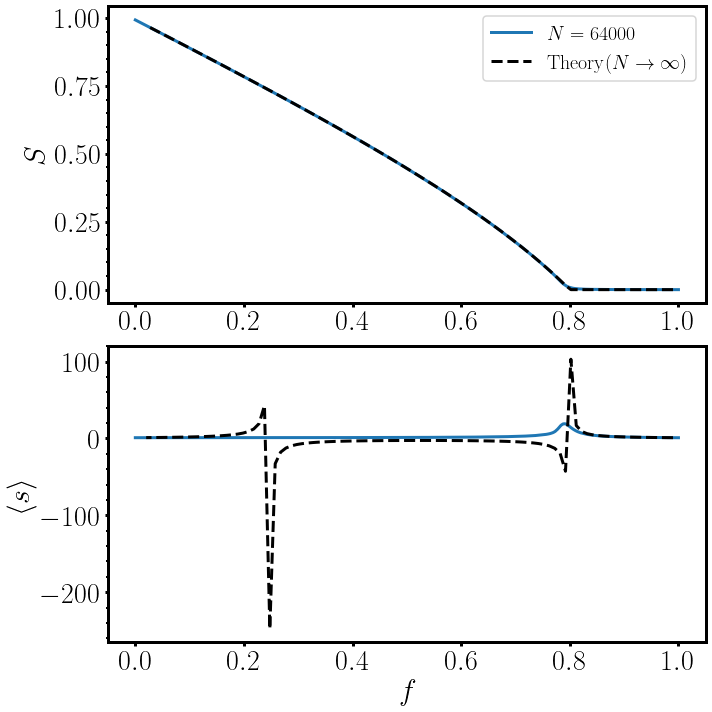

In [7]:
attack = 'Ran'
df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)

def G0(x, c):
    return np.exp(c*(x-1))

def G1(x, c):
    return G0(x, c)

def func(x, r, c):
    return G1(1+(x-1)*r, c) - x

def func_prime(x, r, c):
    return c*r*G1(1+(x-1)*r, c) - 1

n_values = 99
c = 5
r_values = np.linspace(0.01, 0.98, n_values)
f_values = 1 - r_values
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, r in enumerate(r_values):
    f = 1 - r
    sol = root_scalar(func, args=(r, c), fprime=func_prime, x0=0.1, method='newton')
    u = sol.root
    #S = 1 - G1(1+(u-1)*r, c)
    S = r*(1 - u)
    S_values[i] = S
    meanS_values[i] = 1/(1-c*r+c*r*S)  
    
fig, axes = plt.subplots(figsize=(10,10), nrows=2)
ax = axes[0]
#ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = {{{}}}$'.format(N))
ax.plot(f_values, S_values, '--', color='k', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, '--', color='k')

plt.tight_layout()
plt.show()

## **Callaway approach**

### **Random site percolation**

Lets suppose now that only a fraction of nodes in the network are occupied. We state that the occupation probability $r_k$ depends exclusively on the degree of the nodes. Thus, we can build the generating functions

$$
F_0(z) = \sum_{k=0}^{\infty} p_k r_k z^k
$$

and 

$$
F_1(z) = \dfrac{\sum_{k=0}^{\infty} k p_k r_k z^{k-1}}{\sum_{k=0}^{\infty} k p_k} = \dfrac{F'_0(z)}{\langle k \rangle}.
$$

Note that with this definition, $F_0(z)$ and $F_1(z)$ do not sum up to one anymore. Actually,

$$
F_0(1) = \sum_{k=0}^{\infty} p_k r_k,
$$

is the probability of choosing an occupied node and 

$$
F_1(1) = \dfrac{\sum_{k=0}^{\infty} k p_k r_k}{\langle k \rangle} = \sum_{k=0}^{\infty} q_k r_{k+1}
$$

is the probability of randomly choosing a link which points to an occupied node.

Analogously, 

$$
H_1(z) = 1 - F_1(1) + zF_1[H_1(z)]
$$


$$
H_0(z) = 1 - F_0(1) + zF_0[H_1(z)]
$$

$$
S = 1 - H_0(1) = F_0(1) - F_0(u),
$$

where $u$ is solution of the self-consistency equation

$$
u \equiv H_1(1) = 1 - F_1(1) + F_1(u).
$$

Also,

$$
\begin{align}
\langle s \rangle &= \dfrac{H'_0(1)}{H_0(1)} \nonumber \\
 &= \dfrac{ F_0(H_1(1)) + F'_0(H_1(1))H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{ F_0(u) + F'_0(u)H'_1(1)}{1-S} \nonumber \\
 &= \dfrac{1}{1-S} \left[  F_0(u) + F'_0(u)\dfrac{F_1(u)}{1-F'_1(u)} \right] \\
 &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle F^2_1(u)}{1-F'_1(u)} \right]\\
 &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle (F_1(1)-1+u)^2}{1-F'_1(u)} \right]
\end{align}
$$

Lets consider first the case of random percolation, where $r_k = r$. Then, we have 

$$
\begin{align}
F_0(z) &= rG_0(z), \\
F_1(z) &= rG_1(z).
\end{align}
$$

Then, 

$$
\begin{equation} \label{eq:S_callaway_random}
S = r \left[ G_0(1) - G_0(u) \right] = r \left[1- G_0(u) \right],
\end{equation}
$$

where 

$$
\begin{equation} \label{eq:u_callaway_random}
u = 1 - r G_1(1) + r G_1(u) = 1 - r +  r G_1(u).
\end{equation}
$$

Also, the mean cluster size can be computed as 

$$
\begin{align}
\langle s \rangle &= \dfrac{1}{1-S} \left[  rG_0(1) - S + \dfrac{\langle k \rangle (rG_1(1)-1+u)^2}{1-rG'_1(u)} \right] \nonumber \\
&= \dfrac{1}{1-S} \left[ r - S + \dfrac{\langle k \rangle (r-1+u)^2}{1-rG'_1(u)} \right]
\end{align}
$$

**Scaling near the critical point**

From Ec. \ref{eq:u_callaway_random}, we can see that $u=1$ is always a solution. The percolation transition occurs when a non-trivial solution $u < 1$ appears. For each value of $r$, the expression at the right side of Eq. \ref{eq:u_callaway_random} is concave in $u$. Thus, the non-trivial solution appears right at the point in which the derivative of that expression is equal to one. Then, the critical value for $r_c$ is given by

$$
\begin{align}
r_c G'_1(u_c) &= 1 \nonumber \\
r_c G'_1(1) &= 1 \nonumber \\
r_c &= \dfrac{1}{G'_1(1)}
\end{align}
$$

Now, if we consider Ec. \ref{eq:u_callaway_random} in the neighborhood of the critical point and approximate to the first non-trivial order, we have 

$$
\begin{align}
u_c + \delta u &= 1 - (r_c + \delta r) + (r_c+\delta r)\left[ G_1(u_c) + G'_1(u_c) \delta u + \dfrac{G''_1(u_c)}{2} (\delta u)^2 \right] \nonumber \\
1 + \delta u &= 1 - r_c - \delta r + (r_c + \delta r)\left[ 1 + \dfrac{\delta u}{r_c} + \dfrac{G''_1(1)}{2} (\delta u)^2 \right] \nonumber \\
\delta u &= (r_c + \delta r)\left[ \dfrac{\delta u}{r_c} + \dfrac{G''_1(1)}{2} (\delta u)^2 \right] \nonumber \\
0 &= \delta u \left[ \dfrac{\delta r}{r_c} + r_c\dfrac{G''_1(1)}{2} \delta u \right] \nonumber \\
\end{align}
$$

Then,

$$
\begin{equation}
\delta u = -\dfrac{2}{r_c^2} \dfrac{1}{G''_1(1)} \delta r
\end{equation}
$$

Now we can use Eq. \ref{eq:S_callaway_random} to see the scaling of the giant component. Near the critical point, we have

$$
\begin{align}
S &= (r_c + \delta r)\left[ 1 - G_0(u_c) - G'_0(u_c) \delta u \right] \nonumber \\
S &= -(r_c + \delta r) G'_0(1) \delta u \nonumber \\
S &= -(r_c + \delta r) \langle k \rangle \delta u \nonumber \\
S &= \dfrac{2\langle k \rangle}{r_c G''_1(1)} \delta r \nonumber \\
S &= \dfrac{2\langle k \rangle}{r_c G''_1(1)} (r -r_c) \nonumber 
\end{align}
$$

With a similar analysis, we can get the scaling of the mean cluster size near the critical point

$$
\begin{align}
\langle s \rangle &=  \dfrac{\langle k \rangle r_c^2}{1 - (r_c+\delta r) \left[ G'_1(1) +G''_1(1) \delta u\right]} \nonumber \\
\langle s \rangle &=  \dfrac{\langle k \rangle r_c^2}{\dfrac{\delta r}{r_c} + r_c G''_1(1) \delta u} \nonumber \\
\langle s \rangle &=  \dfrac{\langle k \rangle r_c^2}{\dfrac{\delta r}{r_c} - \dfrac{2\delta r}{r_c} } \nonumber \\
\langle s \rangle &=  -\dfrac{\langle k \rangle r_c^3}{\delta r} \nonumber \\
\langle s \rangle &=  \langle k \rangle r_c^3 (r_c - r)^{-1}\nonumber 
\end{align}
$$

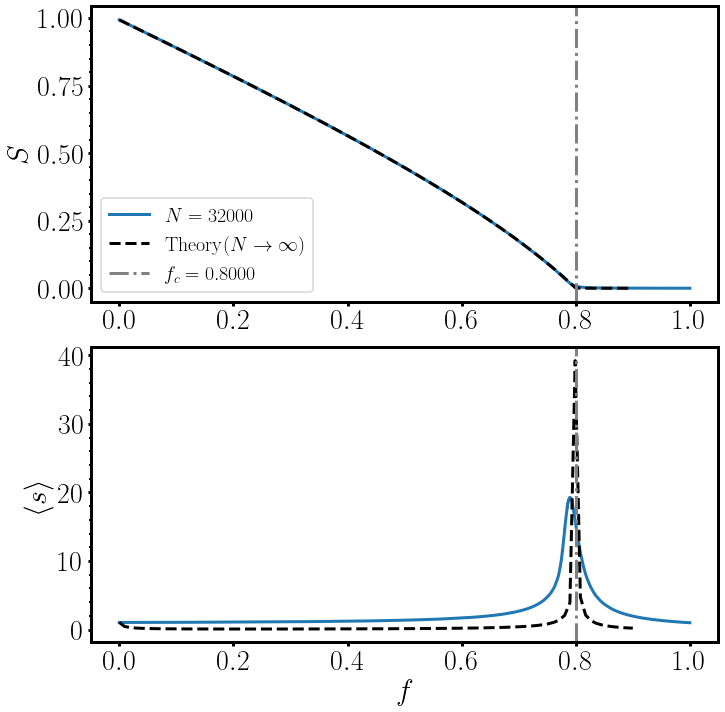

In [8]:
## Erdos-Renyi

attack = 'Ran'
df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)

def func(x, q, c):
    return 1 - q + q*np.exp(c*(x-1)) - x

def func_prime(x, q, c):
    return  c*q*np.exp(c*(x-1)) - 1

n_values = 99
c = 5
f_values = np.linspace(0., 0.9, n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
for i, f in enumerate(f_values):
    q = 1-f
    sol = root_scalar(func, args=(q, c), fprime=func_prime, x0=0.5, method='newton')
    u = sol.root
    S = 1 - u
    S_values[i] = S
    meanS_values[i] = (1/(1-S))*(q-S + c*(q-1+u)**2/(1-q*c*np.exp(c*(u-1))))
    

## Critical point
fc = 1 - 1/c
    
fig, axes = plt.subplots(figsize=(10,10), nrows=2)

ax = axes[0]
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = 32000$')
ax.plot(f_values, S_values, color='k', linestyle='--', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
ax.axvline(fc, linestyle='-.', color='grey', label=r'$f_c = {{{:.4f}}}$'.format(fc))
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, color='k', linestyle='--')
ax.axvline(fc, linestyle='-.', color='grey')

plt.tight_layout()
plt.show()

### **Initial degree site percolation**

Now, lets come back to the original statement where the occupation depends on the degree. We consider as a first approach that we remove all nodes with degree greater than $k_{\mathrm{max}}$. Thus, the expression for $r_k$ is a Heaviside theta function

$$
r_k = \Theta(k_{\mathrm{max}}-k).
$$

Then,

$$
\begin{align}
F_0(z) &= \sum_{k=0}^{k_{\mathrm{max}}} p_k z^k \\
F_1(z) &= \dfrac{\sum_{k=0}^{k_{\mathrm{max}}} k p_k z^{k-1}}{\sum_{k=0}^{{\infty}} k p_k} = \dfrac{F'_0(z)}{\langle k \rangle}
\end{align}
$$

$$
S = F_0(1) - F_0(u),
$$

where 

$$
u \equiv H_1(1) = 1 - F_1(1) + F_1(u).
$$

Also,

$$
\begin{align}
\langle s \rangle &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle (F_1(1)-1+u)^2}{1-F'_1(u)} \right]
\end{align}
$$

In [7]:
## Erdos-Renyi

Pk = Pk_ER
pk = pk_ER

def rk(k, kmax):
    """
    Threshold (Heaviside-like) that depends only on the 
    node degree.
    """
    
    if k < kmax:
        return 1
    return 0

def F0(x, c, kmax):
    """
    Generating function for the degree distribution
    for an initial degree attack in the Callaway version.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, kmax)
        if pk_rk_value == 0:
            break
        s +=  pk_rk_value * x**k
        k += 1
    return s   

def F1(x, c, kmax):
    """
    Generating function for the excess degree distribution
    for an initial degree attack in the Callaway version.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, kmax)
        if pk_rk_value == 0:
            break
        s += k * pk_rk_value * x**(k-1)
        k += 1
    return s / c

def F1_prime(x, c, kmax):
    """
    Derivative of F1.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, kmax)
        if pk_rk_value == 0:
            break
        s += k * (k-1) * pk_rk_value * x**(k-2)
        k += 1
    return s / c

def func(x, c, kmax):
    """
    Self-consistency equation for u = H_1(1) for an
    initial degree attack in the Callaway version.
    """
    
    return 1 - F1(1, c, kmax) + F1(x, c, kmax) - x

def func_prime(x, c, kmax):
    """
    Derivative of func (needed for root_solver with method='newton').
    """
    
    return F1_prime(x, c, kmax) - 1

c = 5
it_values = 20
kmax_values = np.arange(it_values)
S_values = np.zeros(it_values)
meanS_values = np.zeros(it_values)
k_values = np.arange(1, 1+it_values)
f_values = []
for i, kmax in enumerate(kmax_values):

    sol = root_scalar(func, args=(c, kmax), fprime=func_prime, x0=0.5, method='newton')
    u = sol.root
    S = F0(1, c, kmax) - F0(u, c, kmax)
    S_values[i] = S
    
    f_values.append(Pk(kmax, c))
    
    meanS = (F0(u, c, kmax) + c*F1(u, c, kmax)*F1(u, c, kmax))/((1-S)*(1-F1_prime(u, c, kmax)))
    meanS_values[i] = meanS

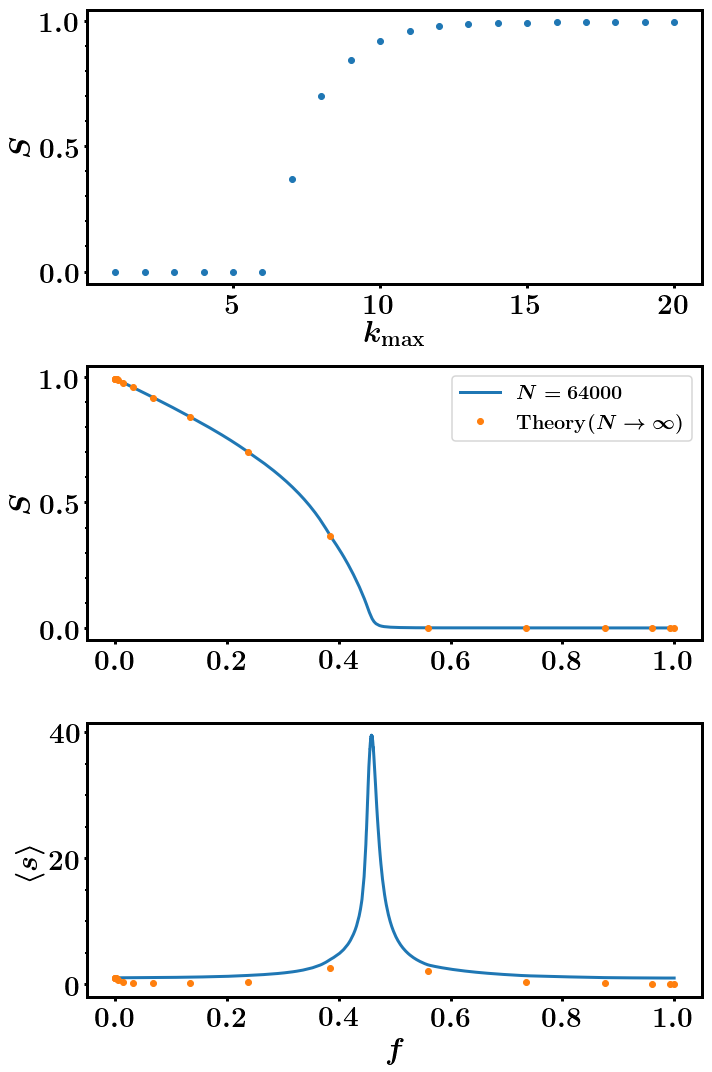

In [8]:
attack = 'Deg'
df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)

fig, axes = plt.subplots(figsize=(10,15), nrows=3)

ax = axes[0]
ax.set_xlabel(r'$k_{\mathrm{max}}$')
ax.set_ylabel(r'$S$')
ax.plot(k_values, S_values, 'o')

ax = axes[1]
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = {{{}}}$'.format(N))
ax.plot(f_values, S_values, 'o', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
ax.legend(loc='best', fontsize=20)

ax = axes[2]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, 'o')

plt.tight_layout()
plt.show()

### **Initial degree with continuous fraction of nodes removed**



Now, lets come back to the original statement where the occupation depends on the degree. We consider as a first approach that we remove all nodes with degree greater than $k_{\mathrm{max}}$. Thus, the expression for $r_k$ is a Heaviside theta function

$$
r_k = \Theta(k_{\mathrm{max}}-k).
$$

Then,

$$
\begin{align}
F_0(z) &= \sum_{k=0}^{k_{\mathrm{max}}} p_k z^k \\
F_1(z) &= \dfrac{\sum_{k=0}^{k_{\mathrm{max}}} k p_k z^{k-1}}{\sum_{k=0}^{{\infty}} k p_k} = \dfrac{F'_0(z)}{\langle k \rangle}
\end{align}
$$

$$
S = F_0(1) - F_0(u),
$$

where 

$$
u \equiv H_1(1) = 1 - F_1(1) + F_1(u).
$$

Also,

$$
\begin{align}
\langle s \rangle &= \dfrac{1}{1-S} \left[  F_0(1) - S + \dfrac{\langle k \rangle (F_1(1)-1+u)^2}{1-F'_1(u)} \right]
\end{align}
$$

Now we consider the case in which we remove a fraction $f$ of the most connected nodes. 

$$
r(k, f) =
\begin{cases}
1,\quad & f \leq P_{k+1}\\
\dfrac{P_k - f}{p_k},\quad & P_{k+1} < f < P_k\\
0,\quad & f \geq P_k
\end{cases}
$$

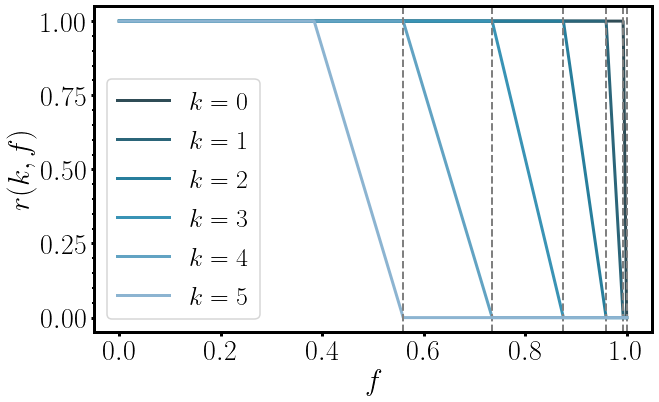

In [11]:
## Erdos-Renyi

Pk = Pk_ER
pk = pk_ER

def rk(k, c, f):
    """
    Threshold for continuos f that depends only on the 
    node degree.
    """
    
    if f < Pk(k+1, c):
        return 1
    elif f >= Pk(k, c):
        return 0
    return (Pk(k, c)-f)/pk(k, c)

c = 5
f_values = np.linspace(0, 1, 1000)

palette = sns.color_palette("PuBuGn_d")[::-1]
fig, ax = plt.subplots(figsize=(10, 6))

for i, k in enumerate(range(6)):
    rk_values = [rk(k, c, f) for f in f_values]
    ax.plot(f_values, rk_values, color=palette[i], label=r'$k = {{{}}}$'.format(k))
    ax.axvline(Pk(k, c), color='grey', linestyle='--', linewidth=2)
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$r(k, f)$')
ax.legend()
plt.show()


$$
\begin{align}
F_0(z;f) &= \sum_{k=0}^{\infty} p_k r(k, f) z^k \\
F_1(z;f) &= \dfrac{\sum_{k=0}^{\infty} k p_k r(k, f) z^{k-1}}{\sum_{k=0}^{{\infty}} k p_k} = \dfrac{F'_0(z;f)}{\langle k \rangle}
\end{align}
$$

$$
S(u, f) = F_0(1;f) - F_0(u;f)
$$

$$
u = 1 - F_1(1;f) + F_1(u;f)
$$

For a fixed value of $f$, and in the neighborhood of $u_c$ we can write

$$
\begin{align}
u &= 1 - F_1(1;f) + F_1(u;f) \\
u_c + \delta u &= 1 - F_1(1;f) + F_1(u_c;f) + \delta u F'_1(u_c; f) + \dfrac{\delta^2u}{2} F''_1(u_c; f) \\
\end{align}
$$

Now, taking into account that $u_c = 1$,

$$
\begin{align}
u &= 1 - F_1(1;f) + F_1(u;f) \\
\delta u &= \delta u F'_1(1; f) + \dfrac{\delta^2u}{2} F''_1(1; f) \\
1 &=  F'_1(u_c; f) + \dfrac{\delta u}{2} F''_1(1; f) \\
\delta u &=  \dfrac{2\left[1- F'_1(1; f)\right]}{F''_1(1; f) }
\end{align}
$$

Now, taking $f = f_c + \delta f$,

$$
\begin{align}
\delta u &=  \dfrac{2\left[1- F'_1(1; f_c) - \delta f \dfrac{\partial F'_1}{\partial f} \right]}{F''_1(u_c; f) }
\end{align}
$$

In [12]:
def F0(x, c, f):
    """
    Generating function for the degree distribution
    for an initial degree attack with continuos f.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, c, f)
        if pk_rk_value == 0:
            break
        s +=  pk_rk_value * x**k
        k += 1
    return s   

def F1(x, c, f):
    """
    Generating function for the excess degree distribution
    for an initial degree attack with continuos f.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, c, f)
        if pk_rk_value == 0:
            break
        s += k * pk_rk_value * x**(k-1)
        k += 1
    return s / c

def F1_prime(x, c, f):
    """
    Derivative of F1.
    """
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk(k, c) * rk(k, c, f)
        if pk_rk_value == 0:
            break
        s += k * (k-1) * pk_rk_value * x**(k-2)
        k += 1
    return s / c


def func(x, c, f):
    return 1 - F1(1, c, f) + F1(x, c, f) - x

def func_prime(x, c, f):
    return F1_prime(x, c, f) - 1

c = 5
n_values = 99
kmax_values = np.arange(n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)

f_values = np.linspace(0.01, 0.8, n_values)
F1_prime_values = np.zeros(n_values)
for i, f in enumerate(f_values):

    sol = root_scalar(func, args=(c, f), fprime=func_prime, x0=0.5, method='newton')
    u = sol.root
    S = F0(1, c, f) - F0(u, c, f)
    S_values[i] = S

    meanS = (F0(u, c, f) + c*F1(u, c, f)*F1(u, c, f))/((1-S)*(1-F1_prime(u, c, f)))
    meanS_values[i] = meanS
    
    F1_prime_values[i] = F1_prime(u, c, f)
    
    
## Critical point

def func_fc(x, c):
    return F1_prime(1, c, x) - 1

sol = root_scalar(func_fc, args=(c), fprime=func_prime, x0=0.5, x1=0.4, method='secant')
fc = sol.root

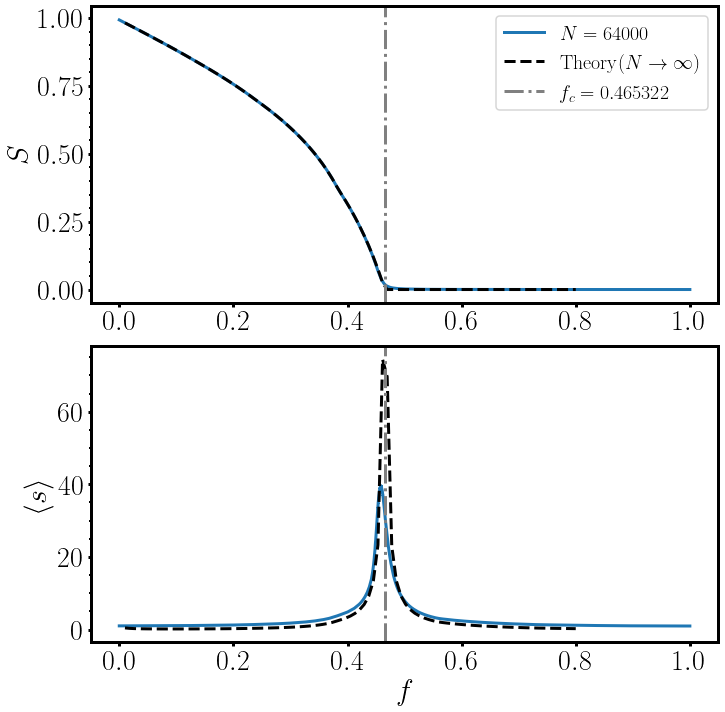

In [13]:
attack = 'Deg'
df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)

fig, axes = plt.subplots(figsize=(10,10), nrows=2)

ax = axes[0]
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = {{{}}}$'.format(N))
ax.plot(f_values, S_values, '--', color='k', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
ax.axvline(fc, linestyle='-.', color='grey', label=r'$f_c = {{{:.6f}}}$'.format(fc))
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, '--', color='k')
ax.axvline(fc, linestyle='-.', color='grey')

plt.tight_layout()
plt.show()

Numerical asessment of the critical exponents $\beta$ and $\gamma$

From scaling theory, we know that the giant component scales as

$$
\begin{equation}
S \sim (f_c - f)^{\beta},\quad f \rightarrow f_c^-
\end{equation}
$$

and that the mean cluster size does it as 

$$
\begin{equation}
\langle s \rangle \sim |f_c - f|^{-\gamma},\quad f \rightarrow f_c
\end{equation}
$$

The exponents can be obtain numerically by solving the equations for $S$ and $\langle s \rangle$ in the neiborhood of the critical point and then plotting these quantities as a function of $f_c - f$.

In [14]:
c = 5
n_values = 20
kmax_values = np.arange(n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)

min_exp = -7
max_exp = -2
f_values = fc - np.logspace(min_exp, max_exp, n_values)
F1_prime_values = np.zeros(n_values)
for i, f in enumerate(f_values):

    sol = root_scalar(func, args=(c, f), fprime=func_prime, x0=0.5, method='newton')
    u = sol.root
    S = F0(1, c, f) - F0(u, c, f)
    S_values[i] = S

    meanS = (F0(u, c, f) + c*F1(u, c, f)*F1(u, c, f))/((1-S)*(1-F1_prime(u, c, f)))
    meanS_values[i] = meanS
    
    F1_prime_values[i] = F1_prime(u, c, f)

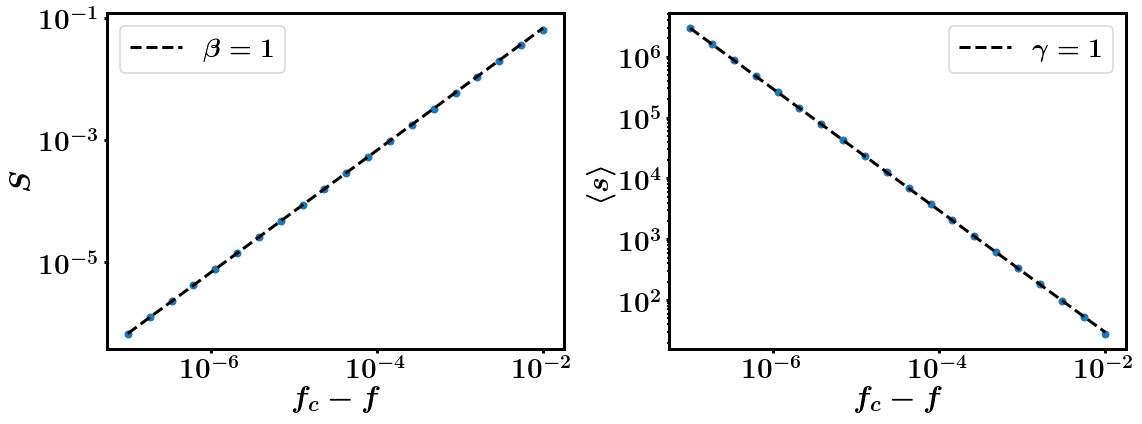

In [16]:
def powerlaw(X, a, b):
    return b*X**a

delta_fc = fc - f_values
X = np.logspace(min_exp, max_exp, 20)

fig, axes = plt.subplots(figsize=(16, 6), ncols=2)

ax = axes[0]
ax.plot(delta_fc, S_values, 'o', markersize=7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$S$')
ax.set_xlabel(r'$f_c - f$')

b = S_values[0]/X[0]
Y = powerlaw(X, 1, b)
ax.plot(X, Y, '--', color='k', label=r'$\beta = 1$')
ax.legend(loc='best')

ax = axes[1]
ax.plot(delta_fc, meanS_values, 'o', markersize=7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\langle s \rangle$')
ax.set_xlabel(r'$f_c - f$')

b = meanS_values[0]*X[0]
Y = powerlaw(X, -1, b)
ax.plot(X, Y, '--', color='k', label=r'$\gamma = 1$')
ax.legend(loc='best')

plt.tight_layout()
plt.show()

### Coreanos

25
[6.73794700e-03 3.36897350e-02 8.42243375e-02 1.40373896e-01
 1.75467370e-01 1.75467370e-01 1.46222808e-01 1.04444863e-01
 6.52780393e-02 3.62655774e-02 1.81327887e-02 8.24217669e-03
 3.43424029e-03 1.32086165e-03 4.71736303e-04 1.57245434e-04
 4.91391982e-05 1.44527054e-05 4.01464038e-06 1.05648431e-06
 2.64121077e-07 6.28859708e-08 1.42922661e-08 3.10701437e-09
 6.47294660e-10 0.00000000e+00]


array([1.09384487e-01, 1.74251362e-01, 2.40816503e-01, 2.21865438e-01,
       1.53298859e-01, 8.47349893e-02, 3.90292301e-02, 1.54083096e-02,
       5.32246299e-03, 1.63418934e-03, 4.51563867e-04, 1.13429972e-04,
       2.61175223e-05, 5.55079424e-06, 1.09535678e-06, 2.01667342e-07,
       3.47381448e-08, 5.56505161e-09, 7.74053972e-10, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

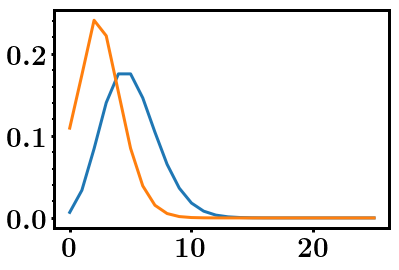

In [97]:
pk_arr = get_pk_arr(pk_ER, 5)

plt.plot(range(K+1), pk_arr)
plt.plot(range(K+1), pk_goh(pk_arr, 0.1))
get_Kmax_arr(pk_arr)

pk_goh(pk_arr, 0.1)

In [91]:
print(pk_arr)
print(pk_goh(pk_arr, 0.1))
print(sum(pk_goh(pk_arr, 0.1)))
#print(pk_arr == update_pk(pk_arr, 0.01))

[6.73794700e-03 3.36897350e-02 8.42243375e-02 1.40373896e-01
 1.75467370e-01 1.75467370e-01 1.46222808e-01 1.04444863e-01
 6.52780393e-02 3.62655774e-02 1.81327887e-02 8.24217669e-03
 3.43424029e-03 1.32086165e-03 4.71736303e-04 1.57245434e-04
 4.91391982e-05 1.44527054e-05 4.01464038e-06 1.05648431e-06
 2.64121077e-07 6.28859708e-08 1.42922661e-08 3.10701437e-09
 6.47294660e-10 0.00000000e+00]
[1.09384487e-01 1.74251362e-01 2.40816503e-01 2.21865438e-01
 1.53298859e-01 8.47349893e-02 3.90292301e-02 1.54083096e-02
 5.32246299e-03 1.63418934e-03 4.51563867e-04 1.13429972e-04
 2.61175223e-05 5.55079424e-06 1.09535678e-06 2.01667342e-07
 3.47381448e-08 5.56505161e-09 7.74053972e-10 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.0463438297116148


In [139]:
pk_arr_f = {}
def pk_goh(pk_arr, f0, df=0.000001):
    
    if f0 in pk_arr_f:
        return pk_arr_f[f0]
    
    f = 0
    while f < f0:
        if f in pk_arr_f:
            pk_arr = pk_arr_f[f]
        else:
            pk_arr = update_pk(pk_arr, df)
            pk_arr_f[f] = pk_arr
        f += df
        
    return pk_arr

In [140]:
len(list(pk_arr_f.keys()))

0

In [126]:
pk_goh(pk_arr, 0.1)

array([1.09374335e-01, 1.74246890e-01, 2.40804871e-01, 2.21856777e-01,
       1.53299188e-01, 8.47413655e-02, 3.90362665e-02, 1.54131981e-02,
       5.32505088e-03, 1.63531228e-03, 4.51979350e-04, 1.13564395e-04,
       2.61562317e-05, 5.56084828e-06, 1.09773663e-06, 2.02185019e-07,
       3.48423119e-08, 5.58453079e-09, 7.77534851e-10, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [144]:
th = 1e-10
def get_Kmax(pk, *params):
    k = 0
    while pk(k, *params) > th:
        k += 1
    return k-1

def get_pk_arr(pk, *params):
    K = get_Kmax(pk, *params)
    pk_arr = np.zeros(K+1)
    for k in range(K):
        pk_arr[k] = pk(k, *params)
    pk_arr[K] = 0
    return pk_arr

def get_Kmax_arr(pk_arr):
    k = 1
    while pk_arr[k] > th:
        k += 1
    return k

def update_pk(pk_arr, df):
    K = get_Kmax_arr(pk_arr)
    mean_k = sum([i*pk_arr[i] for i in range(1, K)])
    pk_arr_updated = np.copy(pk_arr)
    pk_arr_updated[0] = pk_arr[0] + (pk_arr[1] / mean_k + 1) *df
    for k in range(1, K):
        pk_arr_updated[k] = pk_arr[k] + df*K*((k+1)*pk_arr[k+1] - k*pk_arr[k]) / mean_k
    pk_arr_updated[K] = pk_arr[K] - df*K*K*pk_arr[K] / mean_k - df
    if pk_arr_updated[K] < th:
        pk_arr_updated[K] = 0
    return pk_arr_updated

def _pk_goh(pk_arr, f0, df=0.00001):
    f = 0
    while f < f0:
        pk_arr = update_pk(pk_arr, df)
        f += df
    return pk_arr
    
def F0(x, c, f):
    """
    Generating function for the degree distribution
    for an initial degree attack with continuos f.
    """
    
    pk_arr = get_pk_arr(pk, c)
    pk_arr_f = pk_goh(pk_arr, f)
    s = 0
    k = 0
    while True:
        pk_rk_value = pk_arr_f[k]
        if pk_rk_value == 0:
            break
        s +=  pk_arr_f[k] * x**k
        k += 1
    return s   

def F1(x, c, f):
    """
    Generating function for the excess degree distribution
    for an initial degree attack with continuos f.
    """

    pk_arr = get_pk_arr(pk, c)
    pk_arr_f = pk_goh(pk_arr, f)
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk_arr_f[k]
        if pk_rk_value == 0:
            break
        s += k * pk_rk_value * x**(k-1)
        k += 1
    return s / c

def F1_prime(x, c, f):
    """
    Derivative of F1.
    """

    pk_arr = get_pk_arr(pk, c)
    pk_arr_f =  pk_goh(pk_arr, f)
    
    s = 0
    k = 0
    while True:
        pk_rk_value = pk_arr_f[k]
        if pk_rk_value == 0:
            break
        s += k * (k-1) * pk_rk_value * x**(k-2)
        k += 1
    return s / c


def func(x, c, f):
    return 1 - F1(1, c, f) + F1(x, c, f) - x

def func_prime(x, c, f):
    return F1_prime(x, c, f) - 1

c = 5
f_values = np.arange(0.01, 0.41, 0.01)[::-1]
n_values = len(f_values)
print(n_values, f_values)
kmax_values = np.arange(n_values)
S_values = np.zeros(n_values)
meanS_values = np.zeros(n_values)
u_values = np.zeros(n_values)
F1_prime_values = np.zeros(n_values)

for i, f in enumerate(f_values):
    
    F0_val = F1(u, c, f)
    F1_val = F1(u, c, f)
    F1_prime_val = F1_prime(u, c, f)
    
    print(i)
    #sol = root_scalar(func, args=(c, f), fprime=func_prime, x0=0.5, method='newton')
    #u = sol.root
    u = 0.5
    while True:
        new_u = 1 - F1(1, c, f) + F1(u, c, f)
        delta_u = u - new_u
        u = new_u
        if np.fabs(delta_u) < 0.001:
            break
    u_values[i] = u
    
    S = F0(1, c, f) - F0_val
    S_values[i] = S


    meanS = (F0_val + c*F1_val*F1_val)/((1-S)*(1-F1_prime_val))
    meanS_values[i] = meanS
    
    F1_prime_values[i] = F1_prime_val

40 [0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27
 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13
 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01]
0


KeyboardInterrupt: 

In [128]:
## Critical point

def func_fc(x, c):
    return F1_prime(1, c, x) - 1

sol = root_scalar(func_fc, args=(c), fprime=func_prime, x0=0.5, x1=0.2, method='secant')
fc = sol.root
print(fc)

/media/nahuel/datos/d/anaconda3/envs/networks3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/media/nahuel/datos/d/anaconda3/envs/networks3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/media/nahuel/datos/d/anaconda3/envs/networks3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


nan


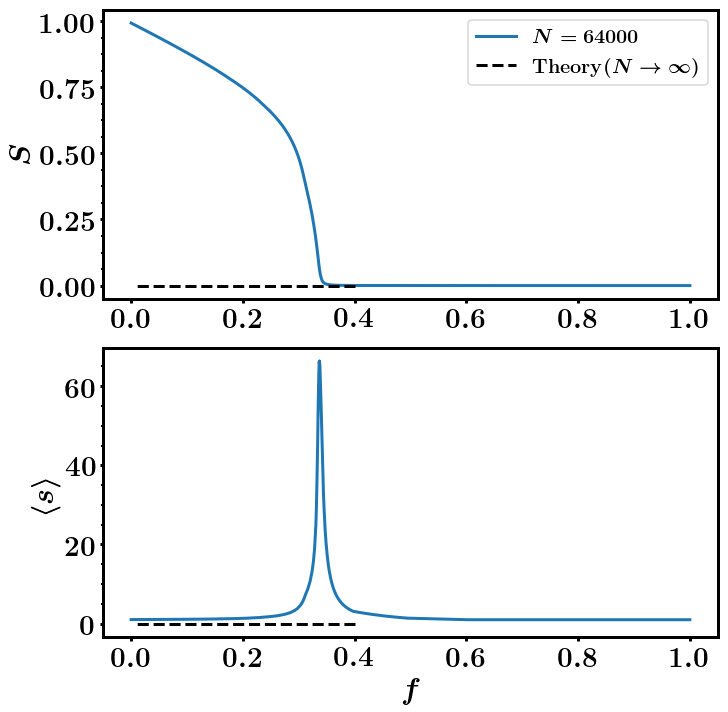

In [147]:
attack = 'DegU'
df = load_dataframe(attack, N, meank, fast=True, n_seeds=n_seeds)

fig, axes = plt.subplots(figsize=(10,10), nrows=2)

ax = axes[0]
ax.set_ylabel(r'$S$')
ax.plot(df.f, df.Sgcc, label=r'$N = {{{}}}$'.format(N))
ax.plot(f_values, S_values, '--', color='k', label=r'$\mathrm{Theory }(N\rightarrow \infty)$')
#ax.axvline(fc, linestyle='-.', color='grey', label=r'$f_c = {{{:.6f}}}$'.format(fc))
ax.legend(loc='best', fontsize=20)

ax = axes[1]
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'$\langle s \rangle$')
ax.plot(df.f, df.meanS)
ax.plot(f_values, meanS_values, '--', color='k')
#ax.axvline(fc, linestyle='-.', color='grey')

plt.tight_layout()
plt.show()